In [1]:
import pandas as pd
import aesara_theano_fallback.tensor as tt
import exoplanet as xo

import pymc3 as pm
import pymc3_ext as pmx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
import pickle
import seaborn as sns
from astropy.io import ascii
from datetime import date

from MonoTools.MonoTools import tools

sns.set_style('ticks')
sns.set_palette('viridis')

from matplotlib import rc
rc('text', usetex=True)
rc('font', size=14)
rc('legend', fontsize=13)
rc('text.latex', preamble=r'\usepackage{cmbright}')

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern'
          }
plt.rcParams.update(params) 


Matplotlib created a temporary config/cache directory at /var/folders/p0/tmr0j01x4jb3qrbc5b0gnxcw0000gn/T/matplotlib-egfv7fjw because the default path (/Users/hosborn/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
alldata = pickle.load(open("all_data_for_combined_model.pkl","rb"))
#trace = pickle.load(open("/Volumes/LUVOIR/Cheops_data/TOI2076/CombModelOutputs/TOI2076_finalmodel_P35_circ_ncbaenwgr_na_nogp_nocontam_fixld_testing_entropy_correlations2_20211117_trace(logp=-2511.3).pkl","rb"))
#pickle.load(open("/Volumes/LUVOIR/Cheops_data/TOI2076/CombModelOutputs/TOI2076_finalmodel_P35_circ_nscsdbanwcgr_na_nogp_nocontam_20211104_trace(logp=1130.9).pkl","rb"))
#/Volumes/LUVOIR/Cheops_data/TOI2076/CombModelOutputs/TOI2076_finalmodel_P35_circ_nscsdbanwcgr_na_nogp_nocontam_20211103_trace(logp=1023.8).pkl","rb"))
#    "TOI2076_finalmodel_P35_circ_nscsdbanwc_na_nogp_nocontam_trace(logp=-3704.3).pkl","rb"))

In [3]:
import glob
import gzip
import pickle

filename='P35_circ_ncbaenwgr_na_nogp_nocontam_fixld_35d_fixed_ror_vals_20211205'
save_loc="/Volumes/LUVOIR/Cheops_data/TOI2076/CombModelOutputs/"

bytes_in = bytearray(0)
max_bytes = 2**31 - 1
for file in glob.glob(save_loc+"TOI2076_finalmodel_"+filename+"_trace*gz"):
    with gzip.open(file, 'rb') as f_in:
        bytes_in += f_in.read(max_bytes)
trace = pickle.loads(bytes_in)

In [4]:
import glob
import gzip
import pickle

filename='P35_circ_ncbaenwgr_na_nogp_nocontam_fixld_add_parameter_groups_pmxsample_20211125'
save_loc="/Volumes/LUVOIR/Cheops_data/TOI2076/CombModelOutputs/"

bytes_in = bytearray(0)
max_bytes = 2**31 - 1
for file in glob.glob(save_loc+"TOI2076_finalmodel_"+filename+"_trace*gz"):
    with gzip.open(file, 'rb') as f_in:
        bytes_in += f_in.read(max_bytes)
oldtrace = pickle.loads(bytes_in)

In [5]:
df=pd.read_csv(glob.glob(save_loc+"TOI2076_finalmodel_"+filename+"*.csv")[0],index_col=0)

In [5]:
filename='P35_circ_ncbaenwgr_na_nogp_nocontam_fixld_looserlds_pargroups_allscopes_20211125'
df=pd.read_csv(glob.glob(save_loc+"TOI2076_finalmodel_"+filename+"*.csv")[0],index_col=0)
filename='P35_circ_ncbaenwgr_na_nogp_nocontam_fixld_add_parameter_groups_pmxsample_20211125'
olddf=pd.read_csv(glob.glob(save_loc+"TOI2076_finalmodel_"+filename+"*.csv")[0],index_col=0)

### Figures and Tables

Figures:
* Photometry from all 6 filters/telescopes detrended for each P=25 and P=35d models
* Photometry from all 4 Cheops visits, including detrending
* TESS photmetry phase-folded on each planet, with offsets for Cheops & ground-based data
* TTVs figure can come when we derive a good TTV model from e.g. TTVfast
* 

Tables:
* Variable, Prior and posterior table for all parameters
* All transit times and uncertainties
* Derived planetary properties for each planet


#### Figure - Ground-based data:

No handles with labels found to put in legend.


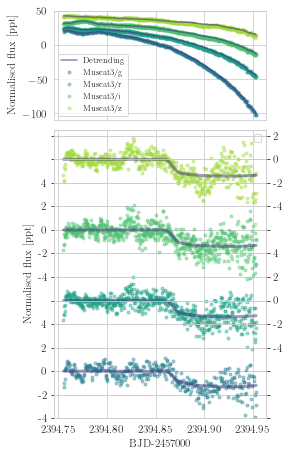

In [29]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

fig=plt.figure(figsize=(3.8,7.5))
gs = gridspec.GridSpec(ncols=1, nrows=7, figure=fig)
raw = fig.add_subplot(gs[:2, :])
detrended = fig.add_subplot(gs[2:, :])

for n,gd in enumerate('griz'):
    if n==0:
        raw.plot(alldata[gd+'_lco']['time'],n*12+np.nanmedian(trace["flux_cor_"+gd+'_lco'],axis=0),
                 '-',alpha=0.6,label="Detrending",color='C0',zorder=7)
    else:
        raw.plot(alldata[gd+'_lco']['time'],n*12+np.nanmedian(trace["flux_cor_"+gd+'_lco'],axis=0),
                 '-',alpha=0.6,color='C0',zorder=7)
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'])
    raw.plot(alldata[gd+'_lco']['time'],n*12+alldata[gd+'_lco']['flux'],
             '.',alpha=0.4,label="Muscat3/"+gd,color='C'+str(n+2))
    #plt.plot(alldata[gd+'_lco']['time'],alldata[gd+'_lco']['flux']-soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'],'.',label=gd)
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass']+soln['d2fdairmass2_'+gd+'_lco']*alldata[gd+'_lco']['airmass']**2,'.',label=gd)
raw.legend(fontsize=8)
raw.set_xticklabels([])
raw.set_ylabel("Normalised flux [ppt]")

detrended2=detrended.twinx()

for n,gd in enumerate('griz'):
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'])
    if n%2==0:
        detrended2.plot(alldata[gd+'_lco']['time'],
                   n*6+alldata[gd+'_lco']['flux']-np.nanmedian(trace["flux_cor_"+gd+'_lco'],axis=0),
                   '.',alpha=0.4,label="LCO/Muscat3 "+gd,color='C'+str(n+2))
        detrended2.plot(alldata[gd+'_lco']['time'],
                 n*6+np.nanmedian(trace["planets_x_"+gd+'_lco'],axis=0),
                 '-',alpha=0.5,color='C0',linewidth=3)

    else:
        detrended.plot(alldata[gd+'_lco']['time'],
                   n*6+alldata[gd+'_lco']['flux']-np.nanmedian(trace["flux_cor_"+gd+'_lco'],axis=0),
                   '.',alpha=0.4,color='C'+str(n+2))
        detrended.plot(alldata[gd+'_lco']['time'],
                 n*6+np.nanmedian(trace["planets_x_"+gd+'_lco'],axis=0),
                 '-',alpha=0.5,color='C0',linewidth=3)

    #plt.plot(alldata[gd+'_lco']['time'],alldata[gd+'_lco']['flux']-soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'],'.',label=gd)
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass']+soln['d2fdairmass2_'+gd+'_lco']*alldata[gd+'_lco']['airmass']**2,'.',label=gd)
detrended.legend(fontsize=9)
detrended.set_yticks(np.arange(-4,21,2))
detrended2.set_yticks(np.arange(-4,21,2))
detrended.set_ylim(-4,20.5)
detrended2.set_ylim(-4,20.5)

detrended.set_yticklabels(list(np.arange(-4,5,2).astype(str))+['']+list(np.arange(-4,5,2).astype(str))+['',''])
detrended2.set_yticklabels(['','','']+list(np.arange(-4,5,2).astype(str))+['']+list(np.arange(-4,3,2).astype(str)))

detrended.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

detrended.set_xlabel("BJD-2457000")
detrended.set_ylabel("Normalised flux [ppt]")
fig.savefig("TOI-2076CheopsPaper/LCO_muscat_data.pdf")


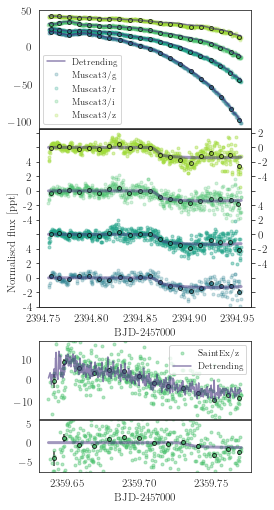

In [9]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

binsize=15/1440

fig=plt.figure(figsize=(3.8,8.5))
gs = gridspec.GridSpec(ncols=1, nrows=70, figure=fig)
lcoraw = fig.add_subplot(gs[:18, :])
lcodetrended = fig.add_subplot(gs[18:45, :])
saintexraw = fig.add_subplot(gs[50:62, :])
saintexdetrended = fig.add_subplot(gs[62:, :])

for n,gd in enumerate('griz'):
    binlc=tools.bin_lc_segment(np.column_stack((alldata[gd+'_lco']['time'],
                                                n*12+alldata[gd+'_lco']['flux'],
                                                alldata[gd+'_lco']['flux_err'])),binsize)
    if n==0:
        lcoraw.plot(alldata[gd+'_lco']['time'],n*12+np.nanmedian(trace["flux_cor_"+gd+'_lco'],axis=0),
                 '-',alpha=0.6,label="Detrending",color='C0',zorder=2)
    else:
        lcoraw.plot(alldata[gd+'_lco']['time'],n*12+np.nanmedian(trace["flux_cor_"+gd+'_lco'],axis=0),
                 '-',alpha=0.6,color='C0',zorder=2)
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'])
    lcoraw.plot(alldata[gd+'_lco']['time'],n*12+alldata[gd+'_lco']['flux'],
             '.',alpha=0.24,label="Muscat3/"+gd,color='C'+str(n+2),zorder=0)
    lcoraw.errorbar(binlc[:,0],binlc[:,1],yerr=binlc[:,2],
                    fmt='o',markeredgecolor='k',markersize=4,alpha=0.75,color='C'+str(n+2),ecolor='k',zorder=1)

    #plt.plot(alldata[gd+'_lco']['time'],alldata[gd+'_lco']['flux']-soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'],'.',label=gd)
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass']+soln['d2fdairmass2_'+gd+'_lco']*alldata[gd+'_lco']['airmass']**2,'.',label=gd)
lcoraw.legend(fontsize=9)
lcoraw.set_xticklabels([])
#lcoraw.set_ylabel("Normalised flux [ppt]")

lcodetrended2=lcodetrended.twinx()

for n,gd in enumerate('griz'):
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'])
    binlc=tools.bin_lc_segment(np.column_stack((alldata[gd+'_lco']['time'],
                                                n*6+alldata[gd+'_lco']['flux']-np.nanmedian(trace["flux_cor_"+gd+'_lco'],axis=0),
                                                alldata[gd+'_lco']['flux_err'])),binsize)
    if n%2==0:
        lcodetrended2.plot(alldata[gd+'_lco']['time'],
                   n*6+alldata[gd+'_lco']['flux']-np.nanmedian(trace["flux_cor_"+gd+'_lco'],axis=0),
                   '.',alpha=0.24,label="LCO/Muscat3 "+gd,color='C'+str(n+2),zorder=0)
        lcodetrended2.plot(alldata[gd+'_lco']['time'],
                 n*6+np.nanmedian(trace["planets_x_"+gd+'_lco'],axis=0),
                 '-',alpha=0.5,color='C0',linewidth=3,zorder=3)
        lcodetrended2.errorbar(binlc[:,0],binlc[:,1],yerr=binlc[:,2],
                               fmt='o',markeredgecolor='k',markersize=4,alpha=0.75,color='C'+str(n+2),ecolor='k',zorder=2)
    else:
        lcodetrended.plot(alldata[gd+'_lco']['time'],
                   n*6+alldata[gd+'_lco']['flux']-np.nanmedian(trace["flux_cor_"+gd+'_lco'],axis=0),
                   '.',alpha=0.4,color='C'+str(n+2),zorder=1)
        lcodetrended.plot(alldata[gd+'_lco']['time'],
                 n*6+np.nanmedian(trace["planets_x_"+gd+'_lco'],axis=0),
                 '-',alpha=0.5,color='C0',linewidth=3,zorder=2)
        lcodetrended.errorbar(binlc[:,0],binlc[:,1],yerr=binlc[:,2],
                               fmt='o',markeredgecolor='k',markersize=4,alpha=0.75,color='C'+str(n+2),ecolor='k',zorder=2)

    #plt.plot(alldata[gd+'_lco']['time'],alldata[gd+'_lco']['flux']-soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'],'.',label=gd)
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass']+soln['d2fdairmass2_'+gd+'_lco']*alldata[gd+'_lco']['airmass']**2,'.',label=gd)
lcodetrended.set_yticks(np.arange(-4,21,2))
lcodetrended2.set_yticks(np.arange(-4,21,2))
lcodetrended.set_ylim(-4,20.5)
lcodetrended2.set_ylim(-4,20.5)

lcodetrended.set_yticklabels(list(np.arange(-4,5,2).astype(str))+['']+list(np.arange(-4,5,2).astype(str))+['',''])
lcodetrended2.set_yticklabels(['','','']+list(np.arange(-4,5,2).astype(str))+['']+list(np.arange(-4,3,2).astype(str)))

lcodetrended.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

lcodetrended.set_xlabel("BJD-2457000")
#lcodetrended.set_ylabel("Normalised flux [ppt]")

saintexraw.plot(alldata['r_sex']['time'],alldata['r_sex']['flux'],
             '.',alpha=0.4,label="SaintEx/"+gd,color='C'+str(2+2))
binlc=tools.bin_lc_segment(np.column_stack((alldata['r_sex']['time'],alldata['r_sex']['flux'],
                                            alldata['r_sex']['flux_err'])),binsize)
saintexraw.errorbar(binlc[:,0],binlc[:,1],yerr=binlc[:,2],
                       fmt='o',markeredgecolor='k',markersize=4,alpha=0.75,color='C'+str(2+2),ecolor='k',zorder=2)

saintexraw.plot(alldata['r_sex']['time'],np.nanmedian(trace["flux_cor_r_sex"],axis=0),
         '-',alpha=0.6,label="Detrending",color='C0',zorder=7)

saintexraw.legend(fontsize=9)
saintexraw.set_xticklabels([])
saintexraw.set_ylim(-19,19)
#saintexraw.set_ylabel("Normalised flux [ppt]")

saintexdetrended.plot(alldata['r_sex']['time'],
           alldata['r_sex']['flux']-np.nanmedian(trace["flux_cor_r_sex"],axis=0),
           '.',alpha=0.4,color='C'+str(2+2))
saintexdetrended.plot(alldata['r_sex']['time'],
         np.nanmedian(trace["planets_x_r_sex"],axis=0),
         '-',alpha=0.5,color='C0',linewidth=3)
binlc=tools.bin_lc_segment(np.column_stack((alldata['r_sex']['time'],
                                            alldata['r_sex']['flux']-np.nanmedian(trace["flux_cor_r_sex"],axis=0),
                                            alldata['r_sex']['flux_err'])),binsize)
saintexdetrended.errorbar(binlc[:,0],binlc[:,1],yerr=binlc[:,2],
                       fmt='o',markeredgecolor='k',markersize=4,alpha=0.75,color='C'+str(2+2),ecolor='k',zorder=2)

saintexdetrended.set_xlabel("BJD-2457000")
#saintexdetrended.set_ylabel("Normalised flux [ppt]")
saintexdetrended.set_ylim(-8,6)
saintexdetrended.xaxis.set_ticks(np.arange(2359.65,2359.79,0.05))
saintexraw.xaxis.set_ticks(np.arange(2359.65,2359.79,0.05))
saintexdetrended.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.text(0.01, 0.5, 'Normalised flux [ppt]', va='center', rotation='vertical')

fig.savefig("TOI-2076CheopsPaper/ground_35d_data2.pdf")


In [5]:
def vals_to_latex(vals):
    #Function to turn -1,0, and +1 sigma values into round latex strings for a table
    try:
        roundval=int(np.min([-1*np.floor(np.log10(abs(vals[1]-vals[0])))+1,-1*np.floor(np.log10(abs(vals[2]-vals[1])))+1]))
        errs=[vals[2]-vals[1],vals[1]-vals[0]]
        if np.round(errs[0],roundval-1)==np.round(errs[1],roundval-1):
            #Errors effectively the same...
            if roundval<0:
                return " $ "+str(int(np.round(vals[1],roundval)))+" \pm "+str(int(np.round(np.average(errs),roundval)))+" $ "
            else:
                return " $ "+str(np.round(vals[1],roundval))+" \pm "+str(np.round(np.average(errs),roundval))+" $ "
        else:
            if roundval<0:
                return " $ "+str(int(np.round(vals[1],roundval)))+"^{+"+str(int(np.round(errs[0],roundval)))+"}_{-"+str(int(np.round(errs[1],roundval)))+"} $ "
            else:
                return " $ "+str(np.round(vals[1],roundval))+"^{+"+str(np.round(errs[0],roundval))+"}_{-"+str(np.round(errs[1],roundval))+"} $ "
    except:
        return " - "

def vals_to_short(vals,roundval=None):
    #Function to turn -1,0, and +1 sigma values into round latex strings for a table
    try:
        if roundval is None:
            roundval=int(np.min([-1*np.floor(np.log10(abs(vals[1]-vals[0])))+1,-1*np.floor(np.log10(abs(vals[2]-vals[1])))+1]))-1
        return " $ "+str(np.round(vals[1],roundval))+" $ "
    except:
        return " - "
    
    
def vals_to_overleaf(name,vals,include_short=True):
    if len(vals)==2 and vals[1]<0.5*vals[0]:
        vals=[vals[0]-vals[1],vals[0],vals[0]+vals[1]]
    
    replace_vals = {'_':'','[':'',']':'','/':'div','-':'minus','0':'zero','1':'one','2':'two','3':'three','4':'four','5':'five','6':'six','7':'seven','8':'eight','9':'nine'}
    for symbol, text in replace_vals.items():
        name = name.replace(symbol, text)
    st = "\\newcommand{\\T"+name+"}{"+vals_to_latex(vals)+"}\n"
    if include_short:
        st+="\\newcommand{\\T"+name+"short}{"+vals_to_short(vals)+"}\n"
    return st

In [13]:
df=pm.summary(trace,[var for var in trace.varnames if '__' not in var and np.product(np.shape(trace[var]))<1.1*np.product(np.shape(trace['t0']))],
              stat_funcs={"5%": lambda x: np.percentile(x, 5),"-$1\sigma$": lambda x: np.percentile(x, 15.87),
                          "median": lambda x: np.percentile(x, 50),"+$1\sigma$": lambda x: np.percentile(x, 84.13),
                          "95%": lambda x: np.percentile(x, 95)},round_to=8)

/Users/hosborn/miniconda3/envs/newxo/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{true_div,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Join.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{0,x}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{true_div,no_inplace}.0
WARNING (theano.tensor.opt): Cannot

WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Join.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{0,x}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{true_div,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Join.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{0,x}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{true_div,no_inplace}.0
WARNING (theano.tensor.opt): Canno

In [47]:
np.nanpercentile(oldtrace['transit_times_2'][:,2],[15.87,50,84.13]),np.nanpercentile(trace['transit_times_2'][:,2],[15.87,50,84.13])

(array([2359.76614262, 2359.78829322, 2359.80970702]),
 array([2394.92248612, 2394.92374554, 2394.92527285]))

In [8]:
strings=[]
allnames=[]
for name,row in df.iterrows():
    if 'log' in name:
        strings+=[vals_to_overleaf(name.replace('log',''),[np.exp(row[col]) for col in ['-$1\sigma$','median','+$1\sigma$']])]
        allnames+=[name.replace('log','')]
    if name not in allnames:
        strings+=[vals_to_overleaf(name,[row[col] for col in ['-$1\sigma$','median','+$1\sigma$']])]
        allnames+=[name]
#strings+=[vals_to_overleaf("transit_times_2[3]",np.nanpercentile(oldtrace['transit_times_2'][:,2],[15.87,50,84.13]))]
allnames+=["transit_times_2[3]"]
from datetime import datetime
with open("TOI-2076CheopsPaper/FileOutput"+datetime.now().strftime("%Y%m%d%H")+".tex","wb") as filez:
    for line in strings:
        filez.write((line+"\n").encode())

In [9]:
"TOI-2076CheopsPaper/FileOutput"+datetime.now().strftime("%Y%m%d%H")+".tex"

'TOI-2076CheopsPaper/FileOutput2021120610.tex'

In [44]:
strings

['\\newcommand{\\Tg}{ $ 97.0^{+1.2}_{-2.0} $ }\n\\newcommand{\\Tgshort}{ $ 97.0 $ }\n',
 '\\newcommand{\\Tlogg}{ $ 4.575^{+0.012}_{-0.021} $ }\n\\newcommand{\\Tloggshort}{ $ 4.57 $ }\n',
 '\\newcommand{\\Ttransittimeszerozero}{ $ 1743.7195 \\pm 0.0023 $ }\n\\newcommand{\\Ttransittimeszerozeroshort}{ $ 1743.719 $ }\n',
 '\\newcommand{\\Ttransittimeszeroone}{ $ 1754.0777 \\pm 0.0013 $ }\n\\newcommand{\\Ttransittimeszerooneshort}{ $ 1754.078 $ }\n',
 '\\newcommand{\\Ttransittimeszerotwo}{ $ 1930.1228 \\pm 0.002 $ }\n\\newcommand{\\Ttransittimeszerotwoshort}{ $ 1930.123 $ }\n',
 '\\newcommand{\\Ttransittimeszerothree}{ $ 1940.4801 \\pm 0.001 $ }\n\\newcommand{\\Ttransittimeszerothreeshort}{ $ 1940.48 $ }\n',
 '\\newcommand{\\Ttransittimeszerofour}{ $ 1950.8345 \\pm 0.0012 $ }\n\\newcommand{\\Ttransittimeszerofourshort}{ $ 1950.835 $ }\n',
 '\\newcommand{\\Ttransittimeszerofive}{ $ 2333.957^{+0.0022}_{-0.0026} $ }\n\\newcommand{\\Ttransittimeszerofiveshort}{ $ 2333.957 $ }\n',
 '\\newcomman

In [95]:
np.nanmedian(trace['transit_times_1'][:,1]-trace['transit_times_1'][:,0])/11

17.19344464453404

In [62]:
cutDistance = 2.5
#all_scopes
#from MonoTools.MonoTools import lightcurve,tools
#lc=lightcurve.multilc(4646810,'tess',load=True)
past_modelling=pd.read_csv('/Volumes/LUVOIR/Cheops_data/TOI2076/CombModelOutputs/TOI2076_finalmodel_P35_circ_ncbaenwgr_na_nogp_nocontam_fixld_add_parameter_groups_pmxsample_20211125_results.csv',index_col=0)
#"/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137_2021-06-29_1_mcmc_output_short.csv",index_col=0)

alldata['tess']['in_trans']   = np.tile(False,len(alldata['tess']['time']))
alldata['tess']['near_trans'] = np.tile(False,len(alldata['tess']['time']))
for nfk in range(4):
    alldata['cheops_'+str(nfk)]['in_trans'] = np.tile(False,len(alldata['cheops_'+str(nfk)]['time']))

init_transit_times={}
init_transit_inds={}
info={}
p=35

trace_shape=trace['planets_x_tess'].shape[1]
modshape=0;
tess_phase={}
for pl in range(3):
    info[pl]={}
    info[pl]['t0']=past_modelling.loc['t0['+str(pl)+']','mean']
    if pl==0:
        info[pl]['p']=past_modelling.loc['derived_period['+str(pl)+']','mean']
    elif pl==1:
        info[pl]['p']=past_modelling.loc['derived_period['+str(pl)+']','mean']
    else:
        if p==25:
            info[pl]['p']=(1938.2899096646295-1762.6651396199247)/7
        elif p==35:
            info[pl]['p']=past_modelling.loc['derived_period['+str(pl)+']','mean']
        elif p==88:
            info[pl]['p']=(1938.2899096646295-1762.6651396199247)/2
    tess_phase[pl]=abs((alldata['tess']['time']-info[pl]['t0']-0.5*info[pl]['p'])%info[pl]['p']-0.5*info[pl]['p'])

lcdic={'time':np.array(list(alldata['tess']['time'][:])),
       'flux':np.array(list(alldata['tess']['flux'][:])),
       'flux_err':np.array(list(alldata['tess']['flux_err'][:])),
       'flux_unit':1}
print(np.nanstd(lcdic['flux']),np.nanmedian(lcdic['flux']),np.nanstd(lcdic['flux_err']),np.nanmedian(lcdic['flux_err']))
lcdic['mask']=tools.maskLc(lcdic,'')
print(np.nanstd(lcdic['flux']),np.nanmedian(lcdic['flux']),np.nanstd(lcdic['flux_err']),np.nanmedian(lcdic['flux_err']))

alldata['tess']['mask']=lcdic['mask']

0.5666230382743256 0.0 0.04871965510449328 0.4168251864494
0.5666143923829033 -1.525863023266183e-05 0.048718911709290984 0.4168188262680083


In [63]:
#0.5666230382743256 0.0 0.04871965510449328 0.4168251864494
#0.5666143923829033 -1.525863023266183e-05 0.048718911709290984 0.4168188262680083
np.array([info[pl]['p'] for pl in info])
#array([10.35503107, 21.01558976, 35.12485869])

array([10.35503107, 21.01558976, 35.12485869])

In [184]:
info

{0: {'t0': 1743.7275231, 'p': 10.35503107, 'dur': 0.13786401016612143},
 1: {'t0': 1748.68891127, 'p': 21.01558976, 'dur': 0.1648593078504715},
 2: {'t0': 1762.6669339, 'p': 35.12485869, 'dur': 0.1282485074706523}}

In [90]:
solns=[]

In [143]:
np.any(alldata['tess']['near_trans'],axis=1).sum()

4410

{0: 0.1376280065354918, 1: 0.16394388645985072, 2: 0.13002451991020464}


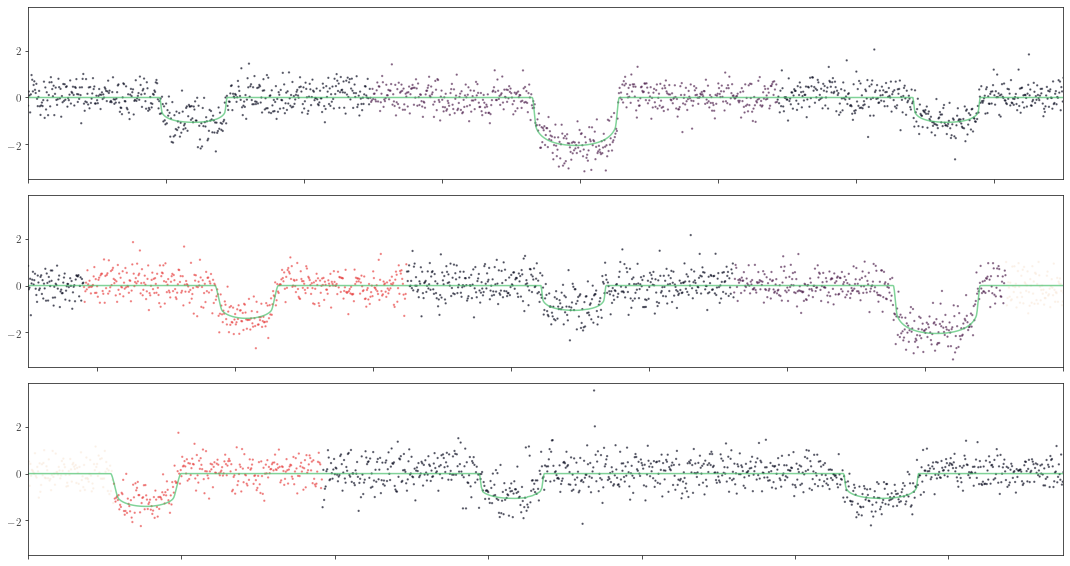

In [226]:
modshape=0
nloop=0

okdurs={0: 0.13752631944318938, 1: 0.16448587779560161, 2: 0.12951080539928086}
while modshape!=trace_shape:
    alldata['tess']['near_trans'] = np.tile(False,(len(alldata['tess']['time']),3))
    info[0]['dur'] = np.random.normal(okdurs[0],
                                      0.4*past_modelling.loc['tdur[0]','sd']/24)
    alldata['tess']['near_trans'][:,0]=tess_phase[0]<cutDistance*info[0]['dur']
    
    info[1]['dur'] = np.random.normal(okdurs[1],
                                      0.4*past_modelling.loc['tdur[1]','sd']/24)
    alldata['tess']['near_trans'][:,1]=tess_phase[1]<cutDistance*info[1]['dur']
    
    info[2]['dur'] = np.random.normal(okdurs[2],
                                      0.4*past_modelling.loc['tdur[2]','sd']/24)
    alldata['tess']['near_trans'][:,2]=tess_phase[2]<cutDistance*info[2]['dur']
    modshape=np.sum(alldata['tess']['mask']&np.any(alldata['tess']['near_trans'],axis=1))
    if nloop%5000==4999:
        print(nloop,np.sum(alldata['tess']['near_trans'],axis=1))
    nloop+=1
#fixdurs={0:0.13831471274637075, 1: 0.16469579057923442, 2: 0.12684928507278107}
#for pl in fixdurs:
#    info[pl]['dur']=fixdurs[pl]
print({pl:info[pl]['dur'] for pl in info})
solns+=[info[pl]['dur'] for pl in info]
for pl in range(3):
    alldata['tess']['in_trans']+=tess_phase[pl]<0.55*info[pl]['dur']
    for nfk in range(4):
        cheops_phase=abs((alldata['cheops_'+str(nfk)]['time']-info[pl]['t0']-0.5*info[pl]['p'])%info[pl]['p']-0.5*info[pl]['p'])
        alldata['cheops_'+str(nfk)]['in_trans']+=abs(cheops_phase)<0.55*info[pl]['dur']

    # Getting the transit time centres:
    tcens=info[pl]['t0']+np.arange(-100,150)*info[pl]['p']
    #ix=np.min(abs(tcens[:,None]-np.hstack([alldata[scope]['time'] for scope in all_scopes])[None,:]),axis=1)<info[pl]['dur']*0.65
    #init_transit_times[pl]=tcens[ix]
    #init_transit_inds[pl]=np.arange(-100,150)[ix]
    #init_transit_inds[pl]-=np.min(init_transit_inds[pl])

from MonoTools.MonoTools import tools

mod,_=tools.kepler_spline(alldata['tess']['time'][:],alldata['tess']['flux'][:],
                    flux_mask=lcdic['mask'],
                    transit_mask=~alldata['tess']['in_trans'][:])
#lcdic=tools.lcFlatten(lcdic, transit_mask=~alldata['tess']['in_trans'][:])#['spline']
alldata['tess']['flux_flat']=alldata['tess']['flux']-mod

alldata['tess']['modtime']     = alldata['tess']['time'][alldata['tess']['mask']&np.any(alldata['tess']['near_trans'],axis=1)]
assert not np.all(okmodtime==alldata['tess']['modtime'])
alldata['tess']['modflux']     = alldata['tess']['flux'][alldata['tess']['mask']&np.any(alldata['tess']['near_trans'],axis=1)]
alldata['tess']['modflux_err'] = alldata['tess']['flux_err'][alldata['tess']['mask']&np.any(alldata['tess']['near_trans'],axis=1)]

plt.figure(figsize=(15,8))
plt.subplot(311)
cols=np.sum(alldata['tess']['near_trans'][alldata['tess']['mask']&np.any(alldata['tess']['near_trans'],axis=1)]*np.array([1,2,4])[None,:],axis=1)
plt.scatter(np.arange(len(alldata['tess']['modflux'])),alldata['tess']['modflux'],
            c=cols,s=1.8,alpha=0.5)
plt.plot(np.nanmedian(trace["planets_x_tess"],axis=0),'-',alpha=0.7,color='C4')
plt.xlim(0,1500)
plt.gca().set_xticklabels([])
plt.subplot(312)
plt.scatter(np.arange(len(alldata['tess']['modflux'])),alldata['tess']['modflux'],
            c=cols,s=1.8,alpha=0.5)
plt.plot(np.nanmedian(trace["planets_x_tess"],axis=0),'-',alpha=0.7,color='C4')
plt.xlim(1500,3000)
plt.gca().set_xticklabels([])
plt.subplot(313)
plt.scatter(np.arange(len(alldata['tess']['modflux'])),alldata['tess']['modflux'],
            c=cols,s=1.8,alpha=0.5)
plt.plot(np.nanmedian(trace["planets_x_tess"],axis=0),'-',alpha=0.7,color='C4')
plt.xlim(3000,4350)
plt.gca().set_xticklabels([])
plt.tight_layout()


In [ ]:
{0: 0.14095986461745924, 1: 0.15894821575739404, 2: 0.12440442384485526}
#Left deep = good; right deep = off
{0: 0.140482278332413, 1: 0.16521964095703512, 2: 0.11936601183461404}
#Left deep = off; right deep = good

        Pretty good

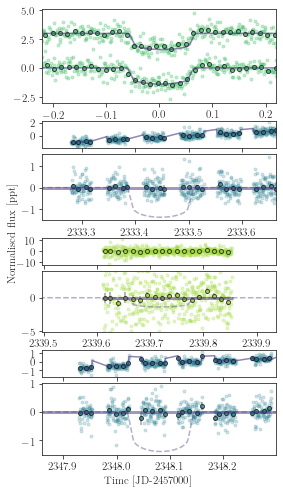

In [231]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

fig=plt.figure(figsize=(4.2,8.2))
gs = gridspec.GridSpec(ncols=1, nrows=80, figure=fig)
tess_d=fig.add_subplot(gs[:17, :])
cheops12 = [[fig.add_subplot(gs[20:25, :]),fig.add_subplot(gs[26:38, :])],
            [fig.add_subplot(gs[61:66, :]),fig.add_subplot(gs[67:80, :])]]
lco3 = [fig.add_subplot(gs[41:46, :]),fig.add_subplot(gs[47:58, :])]

span=np.nanmedian(trace['transit_times_2'][:,1])-np.nanmedian(trace['transit_times_2'][:,0])
shifts=[span*(1+9/4),span*(1+14/6),span*(1+16/7)]
binsize=20/1440

for i in range(2):
    t0=np.nanmedian(trace['transit_times_2'][:,i])
    tess_d.plot(alldata['tess']['modtime'][abs(alldata['tess']['modtime']-t0)<0.255]-t0,
                i*3+alldata['tess']['modflux'][abs(alldata['tess']['modtime']-t0)<0.255],
                '.',color='C'+str(2+2),alpha=0.3)
    bin_tess=tools.bin_lc_segment(np.column_stack((alldata['tess']['modtime'][abs(alldata['tess']['modtime']-t0)<0.255]-t0,
                                          i*3+alldata['tess']['modflux'][abs(alldata['tess']['modtime']-t0)<0.255],
                                          i*3+alldata['tess']['modflux_err'][abs(alldata['tess']['modtime']-t0)<0.255])),binsize)
    tess_d.errorbar(bin_tess[:,0],bin_tess[:,1],yerr=bin_tess[:,2],
                    fmt='o',markeredgecolor='k',markersize=4,alpha=0.7,color='C'+str(2+2),ecolor='#777')
    tess_d.plot(alldata['tess']['modtime'][abs(alldata['tess']['modtime']-t0)<0.255]-t0,
                i*3+np.nanmedian(trace['planets_x_tess'][:,abs(alldata['tess']['modtime']-t0)<0.255],axis=0),
                '-',color='C0',alpha=0.6,zorder=100)

#tess_d.set_xticklabels([])
tess_d.set_xlim(-0.22,+0.22)

tesstransix=abs(alldata['tess']['modtime']-info[2]['t0'])<0.3

for nplot,nch in enumerate([2,0]):
    cheops12[nplot][0].plot(alldata['cheops_'+str(nch)]['time'],alldata['cheops_'+str(nch)]['flux'],
             '.',alpha=0.2,label="cheops",color='C'+str(2))
    bin_raw_cheops=tools.bin_lc_segment(np.column_stack((alldata['cheops_'+str(nch)]['time'],alldata['cheops_'+str(nch)]['flux'],
                                                     alldata['cheops_'+str(nch)]['flux_err'])),binsize)
    cheops12[nplot][0].errorbar(bin_raw_cheops[:,0],bin_raw_cheops[:,1],yerr=bin_raw_cheops[:,2],
                                fmt='o',markeredgecolor='k',markersize=4,alpha=0.7,color='C'+str(0+2),ecolor='#777')
    cheops12[nplot][0].plot(alldata['cheops_'+str(nch)]['time'],np.nanmedian(trace["flux_cor_cheops_"+str(nch)],axis=0),
                     '-',alpha=0.6,label="Detrending",color='C0',zorder=100)


    #plt.plot(alldata[gd+'_lco']['time'],alldata[gd+'_lco']['flux']-soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'],'.',label=gd)
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass']+soln['d2fdairmass2_'+gd+'_lco']*alldata[gd+'_lco']['airmass']**2,'.',label=gd)
    #cheops12[nplot][0].legend()
    cheops12[nplot][0].set_xticklabels([])

    bin_cheops=tools.bin_lc_segment(np.column_stack((alldata['cheops_'+str(nch)]['time'],
                                                     alldata['cheops_'+str(nch)]['flux']-np.nanmedian(trace["flux_cor_cheops_"+str(nch)],axis=0),
                                                     alldata['cheops_'+str(nch)]['flux_err'])),binsize)

    cheops12[nplot][1].plot(alldata['cheops_'+str(nch)]['time'],
               alldata['cheops_'+str(nch)]['flux']-np.nanmedian(trace["flux_cor_cheops_"+str(nch)],axis=0),
               '.',alpha=0.2,color='C'+str(0+2))
    cheops12[nplot][1].errorbar(bin_cheops[:,0],bin_cheops[:,1],yerr=bin_cheops[:,2],
                                fmt='o',markeredgecolor='k',markersize=4,alpha=0.7,color='C'+str(0+2),ecolor='#777')
    if np.nanmin(trace["planetmodels_t_cheops_"+str(nch)])==0:
        cheops12[nplot][1].plot(alldata['cheops_'+str(nch)]['fine_time'],np.tile(0.0,len(alldata['cheops_'+str(nch)]['fine_time'])),
                 '-',alpha=0.5,color='C0',linewidth=3,zorder=100)
    else:
        cheops12[nplot][1].plot(alldata['cheops_'+str(nch)]['fine_time'],
                 np.nanmedian(trace["planetmodels_t_cheops_"+str(nch)],axis=0),
                 '-',alpha=0.5,color='C0',linewidth=3,zorder=100)
    cheops12[nplot][1].plot(alldata['tess']['modtime'][tesstransix]+shifts[nplot],
                            np.nanmedian(trace["planets_x_tess"][:,tesstransix],axis=0),'--',alpha=0.4,zorder=100)
        #plt.plot(alldata[gd+'_lco']['time'],alldata[gd+'_lco']['flux']-soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'],'.',label=gd)
        #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass']+soln['d2fdairmass2_'+gd+'_lco']*alldata[gd+'_lco']['airmass']**2,'.',label=gd)
    #cheops12[nplot][1].set_ylim(-4,20.5)
    cheops12[nplot][1].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    #cheops12[nplot][1].set_xlim(alldata['cheops_'+str(nch)]['time'][0]-0.02,alldata['cheops_'+str(nch)]['time'][-1]+0.02)
    #cheops12[nplot][0].set_xlim(alldata['cheops_'+str(nch)]['time'][0]-0.02,alldata['cheops_'+str(nch)]['time'][-1]+0.02)
    cheops12[nplot][0].set_xlim(np.nanmedian(trace['transit_times_2'][:,0])+shifts[nplot]-0.22,np.nanmedian(trace['transit_times_2'][:,0])+shifts[nplot]+0.22)
    cheops12[nplot][1].set_xlim(np.nanmedian(trace['transit_times_2'][:,0])+shifts[nplot]-0.22,np.nanmedian(trace['transit_times_2'][:,0])+shifts[nplot]+0.22)

cheops12[1][0].set_xlabel("BJD-2457000")

lco3[0].plot(alldata['z_mcd']['time'],alldata['z_mcd']['flux'],
             '.',alpha=0.25,label="SaintEx/r",color='C'+str(3+2))
bin_raw_lco=tools.bin_lc_segment(np.column_stack((alldata['z_mcd']['time'],alldata['z_mcd']['flux'],
                                                  alldata['z_mcd']['flux_err'])),binsize)
lco3[0].errorbar(bin_raw_lco[:,0],bin_raw_lco[:,1],yerr=bin_raw_lco[:,2],
                            fmt='o',markeredgecolor='k',markersize=4,alpha=0.7,color='C'+str(3+2),ecolor='#777')
lco3[0].plot(alldata['z_mcd']['time'],np.nanmedian(trace["flux_cor_z_mcd"],axis=0),
         '-',alpha=0.6,label="Detrending",color='C0',zorder=-1)

#lco3[0].legend()
lco3[0].set_xticklabels([])

lco3[1].plot(alldata['z_mcd']['time'],
             alldata['z_mcd']['flux']-np.nanmedian(trace["flux_cor_z_mcd"],axis=0),
           '.',alpha=0.25,color='C'+str(3+2))
lco3[1].plot(alldata['z_mcd']['time'],np.zeros(len(alldata['z_mcd']['time'])),
         '-',alpha=0.5,color='C0',linewidth=3,zorder=100)
bin_lco=tools.bin_lc_segment(np.column_stack((alldata['z_mcd']['time'],
                                              alldata['z_mcd']['flux']-np.nanmedian(trace["flux_cor_z_mcd"],axis=0),
                                              alldata['z_mcd']['flux_err'])),binsize)
lco3[1].errorbar(bin_lco[:,0],bin_lco[:,1],yerr=bin_lco[:,2],
                            fmt='o',markeredgecolor='k',markersize=4,alpha=0.7,color='C'+str(3+2),ecolor='#777')

lco3[1].plot(alldata['tess']['modtime'][tesstransix]+shifts[2],
            np.nanmedian(trace["planets_x_tess"][:,tesstransix],axis=0),'--',alpha=0.4,zorder=100)

lco3[1].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
lco3[1].set_ylim(-5.2,4)

#lco3[0].set_xlim(alldata['z_mcd']['time'][0]-0.015,alldata['z_mcd']['time'][-1]+0.015)
#lco3[1].set_xlim(alldata['z_mcd']['time'][0]-0.015,alldata['z_mcd']['time'][-1]+0.015)
lco3[0].set_xlim(np.nanmedian(trace['transit_times_2'][:,0])+shifts[2]-0.22,np.nanmedian(trace['transit_times_2'][:,0])+shifts[2]+0.22)
lco3[1].set_xlim(np.nanmedian(trace['transit_times_2'][:,0])+shifts[2]-0.22,np.nanmedian(trace['transit_times_2'][:,0])+shifts[2]+0.22)

fig.text(0.01, 0.5, 'Normalised flux [ppt]', va='center', rotation='vertical')
fig.text(0.33, 0.08, 'Time [JD-2457000]', va='center')

fig.savefig("TOI-2076CheopsPaper/all_35d_flatlines_ref.pdf")


In [26]:
(2274.08398-1937.82201)/21

16.012474761904752

In [6]:
b_tess=np.array([[1743.7193,0.0022],[1754.0776,0.0012],[1930.1221,0.002],[1940.4798,0.0011],[1950.8343,0.0013]])
b_che=np.array([2333.9547,0.0024])
c_tess=np.array([[1748.69408,0.00079],[1937.82201,0.0008]])
c_che=np.array([2274.08398,0.00079])

In [23]:
import pymc3 as pm
with pm.Model() as bmodel:
    t0b=pm.Normal('t0b',mu=1930.1221,sd=0.025)
    pb=pm.Normal('pb',mu=(1950.8343-1743.7193)/20,sd=0.05/20)
    transb=t0b+np.array([-18,-17,0,1,2])*pb
    b_obs = pm.Normal("b_obs", mu=transb, sigma=b_tess[:,1], observed=b_tess[:,0])
    pred_b=t0b + 39*pb
    diff_b=pm.Deterministic("diff_b",1440*(b_che[0]-pred_b))
    bmap_estimate = pm.find_MAP()
    traceb = pm.sample(500,start=bmap_estimate)
pm.summary(traceb)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pb, t0b]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 19 seconds.


In [28]:
import forecaster3

In [51]:
%load_ext autoreload
%autoreload 2
from forecaster3 import mr_forecast as mr
# predict the mean and std of radius given mass measurements
mr.Rstat2M(mean=2.518, std=0.036, unit='Earth', sample_size=100)

TypeError: 'float' object cannot be interpreted as an integer

In [25]:
pm.summary(traceb)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
t0b,1930.123,0.001,1930.122,1930.125,0.000,0.000,1092.0,1288.0,1.0
pb,10.356,0.000,10.356,10.356,0.000,0.000,1118.0,1202.0,1.0
diff_b,-57.499,4.602,-65.329,-48.190,0.143,0.101,1042.0,1084.0,1.0


In [27]:
with pm.Model() as cmodel:
    t0c=pm.Normal('t0c',mu=1937.82201,sd=0.025)
    pc=pm.Normal('pc',mu=(1937.82201-1748.69408)/9,sd=0.05/9)
    transc=t0c+np.array([-9,0])*pc
    c_obs = pm.Normal("c_obs", mu=transc, sigma=c_tess[:,1], observed=c_tess[:,0])
    pred_c=t0c+16*pc
    diff_c=pm.Deterministic("diff_c",1440*(c_che[0]-pred_c))
    cmap_estimate = pm.find_MAP()
    tracec = pm.sample(500,start=cmap_estimate)
pm.summary(tracec)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pc, t0c]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 22 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
t0c,1937.822,0.001,1937.821,1937.824,0.000,0.000,664.0,879.0,1.0
pc,21.014,0.000,21.014,21.014,0.000,0.000,641.0,820.0,1.0
diff_c,49.696,4.021,42.293,57.271,0.165,0.116,599.0,803.0,1.0


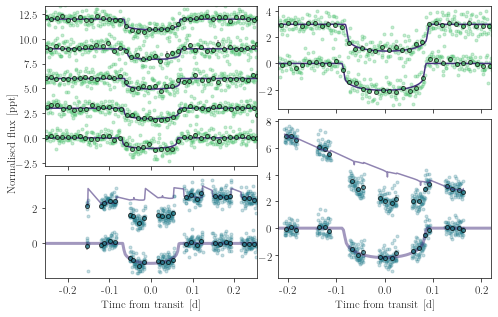

In [227]:
binsize=20/1440
fig=plt.figure(figsize=(8,5))

gs = gridspec.GridSpec(nrows=5,ncols=2, figure=fig)
tess_b =   fig.add_subplot(gs[:3, 0])
cheops_b = fig.add_subplot(gs[3:, 0])
tess_c =   fig.add_subplot(gs[:2, 1])
cheops_c = fig.add_subplot(gs[2:, 1])

for i in range(5):
    t0=np.nanmedian(trace['transit_times_0'][:,i])
    tess_b.plot(alldata['tess']['modtime'][abs(alldata['tess']['modtime']-t0)<0.255]-t0,
                i*3+alldata['tess']['modflux'][abs(alldata['tess']['modtime']-t0)<0.255],
                '.',color='C'+str(2+2),alpha=0.3)
    bin_tess=tools.bin_lc_segment(np.column_stack((alldata['tess']['modtime'][abs(alldata['tess']['modtime']-t0)<0.255]-t0,
                                          i*3+alldata['tess']['modflux'][abs(alldata['tess']['modtime']-t0)<0.255],
                                          i*3+alldata['tess']['modflux_err'][abs(alldata['tess']['modtime']-t0)<0.255])),binsize)
    tess_b.errorbar(bin_tess[:,0],bin_tess[:,1],yerr=bin_tess[:,2],
                    fmt='o',markeredgecolor='k',markersize=4,alpha=0.7,color='C'+str(2+2),ecolor='#777')

    tess_b.plot(alldata['tess']['modtime'][abs(alldata['tess']['modtime']-t0)<0.255]-t0,
                i*3+np.nanmedian(trace['planets_x_tess'][:,abs(alldata['tess']['modtime']-t0)<0.255],axis=0),
                '-',color='C0')
tess_b.set_xticklabels([])
tess_b.set_ylim(-2.8,13.3)
tess_b.set_xlim(-0.255,+0.255)

nch=1
t0=np.nanmedian(trace['transit_times_0'][:,-1])
bin_raw_cheops=tools.bin_lc_segment(np.column_stack((alldata['cheops_'+str(nch)]['time']-t0,
                                                     2.4+alldata['cheops_'+str(nch)]['flux'],
                                                     alldata['cheops_'+str(nch)]['flux_err'])),binsize)
cheops_b.plot(alldata['cheops_'+str(nch)]['time']-t0,2.4+alldata['cheops_'+str(nch)]['flux'],
         '.',alpha=0.25,label="cheops",color='C'+str(2))
cheops_b.errorbar(bin_raw_cheops[:,0],bin_raw_cheops[:,1],yerr=bin_raw_cheops[:,2],
                            fmt='o',markeredgecolor='k',markersize=4,alpha=0.7,color='C'+str(2),ecolor='#777')
cheops_b.plot(alldata['cheops_'+str(nch)]['time']-t0,2.4+np.nanmedian(trace["flux_cor_cheops_"+str(nch)],axis=0),
                 '-',alpha=0.6,label="Detrending",color='C0')

#plt.plot(alldata[gd+'_lco']['time'],alldata[gd+'_lco']['flux']-soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'],'.',label=gd)
#plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass']+soln['d2fdairmass2_'+gd+'_lco']*alldata[gd+'_lco']['airmass']**2,'.',label=gd)
#cheops12[nplot][0].legend()
bin_cheops=tools.bin_lc_segment(np.column_stack((alldata['cheops_'+str(nch)]['time']-t0,
                                                 alldata['cheops_'+str(nch)]['flux']-np.nanmedian(trace["flux_cor_cheops_"+str(nch)],axis=0),
                                                 alldata['cheops_'+str(nch)]['flux_err'])),binsize)
cheops_b.plot(alldata['cheops_'+str(nch)]['time']-t0,
           alldata['cheops_'+str(nch)]['flux']-np.nanmedian(trace["flux_cor_cheops_"+str(nch)],axis=0),
           '.',alpha=0.25,color='C'+str(0+2))
cheops_b.errorbar(bin_cheops[:,0],bin_cheops[:,1],yerr=bin_cheops[:,2],
                  fmt='o',markeredgecolor='k',markersize=4,alpha=0.7,color='C'+str(2),ecolor='#777')
cheops_b.plot(alldata['cheops_'+str(nch)]['fine_time']-t0,
         np.nanmedian(trace["planetmodels_t_cheops_"+str(nch)],axis=0),
         '-',alpha=0.5,color='C0',linewidth=3)
    #plt.plot(alldata[gd+'_lco']['time'],alldata[gd+'_lco']['flux']-soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'],'.',label=gd)
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass']+soln['d2fdairmass2_'+gd+'_lco']*alldata[gd+'_lco']['airmass']**2,'.',label=gd)
#cheops12[nplot][1].set_ylim(-4,20.5)
cheops_b.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

cheops_b.set_xlim(-0.255,+0.255)
#alldata['cheops_'+str(nch)]['time'][0]-0.02,alldata['cheops_'+str(nch)]['time'][-1]+0.02)


for i in range(2):
    t0=np.nanmedian(trace['transit_times_1'][:,i])
    tess_c.plot(alldata['tess']['modtime'][abs(alldata['tess']['modtime']-t0)<0.255]-t0,
                i*3+alldata['tess']['modflux'][abs(alldata['tess']['modtime']-t0)<0.255],
                '.',color='C'+str(2+2),alpha=0.3)
    bin_tess=tools.bin_lc_segment(np.column_stack((alldata['tess']['modtime'][abs(alldata['tess']['modtime']-t0)<0.255]-t0,
                                          i*3+alldata['tess']['modflux'][abs(alldata['tess']['modtime']-t0)<0.255],
                                          i*3+alldata['tess']['modflux_err'][abs(alldata['tess']['modtime']-t0)<0.255])),binsize)
    tess_c.errorbar(bin_tess[:,0],bin_tess[:,1],yerr=bin_tess[:,2],
                    fmt='o',markeredgecolor='k',markersize=4,alpha=0.7,color='C'+str(2+2),ecolor='#777')
    tess_c.plot(alldata['tess']['modtime'][abs(alldata['tess']['modtime']-t0)<0.255]-t0,
                i*3+np.nanmedian(trace['planets_x_tess'][:,abs(alldata['tess']['modtime']-t0)<0.255],axis=0),
                '-',color='C0')
tess_c.set_xticklabels([])
tess_c.set_xlim(-0.22,+0.22)

nch=3
t0=np.nanmedian(trace['transit_times_1'][:,-1])
bin_raw_cheops=tools.bin_lc_segment(np.column_stack((alldata['cheops_'+str(nch)]['time']-t0,
                                                     3+alldata['cheops_'+str(nch)]['flux'],
                                                 alldata['cheops_'+str(nch)]['flux_err'])),binsize)
cheops_c.plot(alldata['cheops_'+str(nch)]['time']-t0,3+alldata['cheops_'+str(nch)]['flux'],
         '.',alpha=0.25,label="cheops",color='C'+str(2))
cheops_c.errorbar(bin_raw_cheops[:,0],bin_raw_cheops[:,1],yerr=bin_raw_cheops[:,2],
                  fmt='o',markeredgecolor='k',markersize=4,alpha=0.7,color='C'+str(2),ecolor='#777')
cheops_c.plot(alldata['cheops_'+str(nch)]['time']-t0,3+np.nanmedian(trace["flux_cor_cheops_"+str(nch)],axis=0),
                 '-',alpha=0.6,label="Detrending",color='C0',zorder=7)
#plt.plot(alldata[gd+'_lco']['time'],alldata[gd+'_lco']['flux']-soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'],'.',label=gd)
#plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass']+soln['d2fdairmass2_'+gd+'_lco']*alldata[gd+'_lco']['airmass']**2,'.',label=gd)
#cheops12[nplot][0].legend()
bin_cheops=tools.bin_lc_segment(np.column_stack((alldata['cheops_'+str(nch)]['time']-t0,
                                                 alldata['cheops_'+str(nch)]['flux']-np.nanmedian(trace["flux_cor_cheops_"+str(nch)],axis=0),
                                                 alldata['cheops_'+str(nch)]['flux_err'])),binsize)
cheops_c.plot(alldata['cheops_'+str(nch)]['time']-t0,
           alldata['cheops_'+str(nch)]['flux']-np.nanmedian(trace["flux_cor_cheops_"+str(nch)],axis=0),
           '.',alpha=0.25,color='C'+str(0+2))
cheops_c.errorbar(bin_cheops[:,0],bin_cheops[:,1],yerr=bin_cheops[:,2],
                  fmt='o',markeredgecolor='k',markersize=4,alpha=0.7,color='C'+str(2),ecolor='#777')
cheops_c.plot(alldata['cheops_'+str(nch)]['fine_time']-t0,
         np.nanmedian(trace["planetmodels_t_cheops_"+str(nch)],axis=0),
         '-',alpha=0.5,color='C0',linewidth=3)
#plt.plot(alldata[gd+'_lco']['time'],alldata[gd+'_lco']['flux']-soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'],'.',label=gd)
#plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass']+soln['d2fdairmass2_'+gd+'_lco']*alldata[gd+'_lco']['airmass']**2,'.',label=gd)
#cheops12[nplot][1].set_ylim(-4,20.5)
cheops_c.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
cheops_c.set_xlim(-0.22,+0.22)
#cheops_c.set_xlim(alldata['cheops_'+str(nch)]['time'][0]-0.02,alldata['cheops_'+str(nch)]['time'][-1]+0.02)

cheops_b.set_xlabel("Time from transit [d]")
cheops_c.set_xlabel("Time from transit [d]")

fig.subplots_adjust(wspace=0.1)

fig.text(0.06, 0.5, 'Normalised flux [ppt]', va='center', rotation='vertical')

fig.savefig("TOI-2076CheopsPaper/all_bc_transits_ref.pdf")


In [122]:
trace['planets_x_tess'][:,abs(alldata['tess']['modtime']-t0)<0.255]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
print(trace['planets_x_tess'].shape, len(abs(alldata['tess']['modtime']-t0)<0.255))

(28000, 4364) 4280


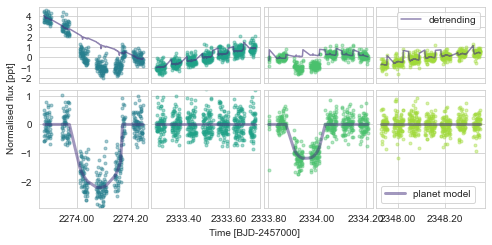

In [154]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

fig=plt.figure(figsize=(8,3.7))
gs = gridspec.GridSpec(ncols=4, nrows=5, figure=fig,wspace=0.03)
raws = {n:fig.add_subplot(gs[:2, n]) for n in range(4)}
detrendeds = {n:fig.add_subplot(gs[2:, n]) for n in range(4)}

for n in range(4):
    raws[n].plot(alldata['cheops_'+str(3-n)]['time'],np.nanmedian(trace["flux_cor_cheops_"+str(3-n)],axis=0),
                 '-',alpha=0.6,label="detrending",color='C0',zorder=7)
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'])
    raws[n].plot(alldata['cheops_'+str(3-n)]['time'],alldata['cheops_'+str(3-n)]['flux'],
             '.',alpha=0.4,color='C'+str(n+2))
    #plt.plot(alldata[gd+'_lco']['time'],alldata[gd+'_lco']['flux']-soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'],'.',label=gd)
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass']+soln['d2fdairmass2_'+gd+'_lco']*alldata[gd+'_lco']['airmass']**2,'.',label=gd)
    if n>0:
        raws[n].set_yticklabels([])
        
    #raws[n].legend()
    raws[n].set_xticklabels([])
    raws[n].set_ylim(-2.5,4.95)
    raws[n].set_yticks(np.arange(-2,4.1,1))
    if n==3:
        raws[n].legend()

for n,gd in enumerate('griz'):
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'])
    detrendeds[n].plot(alldata['cheops_'+str(3-n)]['time'],
               alldata['cheops_'+str(3-n)]['flux']-np.nanmedian(trace["flux_cor_cheops_"+str(3-n)],axis=0),
               '.',alpha=0.4,color='C'+str(n+2))
    detrendeds[n].plot(alldata['cheops_'+str(3-n)]['time'],
             np.nanmedian(trace["planets_x_cheops_"+str(3-n)],axis=0),
             '-',alpha=0.5,color='C0',linewidth=3,label='planet model')

    #plt.plot(alldata[gd+'_lco']['time'],alldata[gd+'_lco']['flux']-soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'],'.',label=gd)
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass']+soln['d2fdairmass2_'+gd+'_lco']*alldata[gd+'_lco']['airmass']**2,'.',label=gd)
    #detrendeds.legend()
    detrendeds[n].set_yticks(np.arange(-3,1.1,1))
    detrendeds[n].set_ylim(-2.9,1.2)
    detrendeds[n].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    #detrendeds[n].set_xlabel("BJD-2457000")
    if n>0:
        detrendeds[n].set_yticklabels([])
    if n==3:
        detrendeds[n].legend()

fig.text(0.5, 0.02, 'Time [BJD-2457000]', ha='center')
fig.text(0.07, 0.5, 'Normalised flux [ppt]', va='center', rotation='vertical')

fig.savefig("TOI-2076CheopsPaper/cheops_data.pdf")


In [ ]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

fig=plt.figure(figsize=(3.8,7.5))
gs = gridspec.GridSpec(ncols=1, nrows=6, figure=fig)
raw = fig.add_subplot(gs[:2, :])
detrended = fig.add_subplot(gs[2:, :])

raw.plot(alldata['r_sex']['time'],n*12+np.nanmedian(trace["flux_cor_"+gd+'_lco'],axis=0),
         '-',alpha=0.6,label="Detrending",color='C0',zorder=7)
raw.plot(alldata[gd+'_lco']['time'],n*12+np.nanmedian(trace["flux_cor_"+gd+'_lco'],axis=0),
         '-',alpha=0.6,color='C0',zorder=7)
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'])
    raw.plot(alldata[gd+'_lco']['time'],n*12+alldata[gd+'_lco']['flux'],
             '.',alpha=0.4,label="Muscat3/"+gd,color='C'+str(n+2))
    #plt.plot(alldata[gd+'_lco']['time'],alldata[gd+'_lco']['flux']-soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'],'.',label=gd)
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass']+soln['d2fdairmass2_'+gd+'_lco']*alldata[gd+'_lco']['airmass']**2,'.',label=gd)
raw.legend()
raw.set_xticklabels([])
raw.set_ylabel("Normalised flux [ppt]")

detrended2=detrended.twinx()

for n,gd in enumerate('griz'):
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'])
    if n%2==0:
        detrended2.plot(alldata[gd+'_lco']['time'],
                   n*6+alldata[gd+'_lco']['flux']-np.nanmedian(trace["flux_cor_"+gd+'_lco'],axis=0),
                   '.',alpha=0.4,label="LCO/Muscat3 "+gd,color='C'+str(n+2))
        detrended2.plot(alldata[gd+'_lco']['time'],
                 n*6+np.nanmedian(trace["planets_x_"+gd+'_lco'],axis=0),
                 '-',alpha=0.5,color='C0',linewidth=3)

    else:
        detrended.plot(alldata[gd+'_lco']['time'],
                   n*6+alldata[gd+'_lco']['flux']-np.nanmedian(trace["flux_cor_"+gd+'_lco'],axis=0),
                   '.',alpha=0.4,label="LCO/MuSCAT3 "+gd,color='C'+str(n+2))
        detrended.plot(alldata[gd+'_lco']['time'],
                 n*6+np.nanmedian(trace["planets_x_"+gd+'_lco'],axis=0),
                 '-',alpha=0.5,color='C0',linewidth=3)

    #plt.plot(alldata[gd+'_lco']['time'],alldata[gd+'_lco']['flux']-soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass'],'.',label=gd)
    #plt.plot(alldata[gd+'_lco']['time'],n*8+soln['dfdairmass_'+gd+'_lco']*alldata[gd+'_lco']['airmass']+soln['d2fdairmass2_'+gd+'_lco']*alldata[gd+'_lco']['airmass']**2,'.',label=gd)
detrended.legend()
detrended.set_yticks(np.arange(-4,21,2))
detrended2.set_yticks(np.arange(-4,21,2))
detrended.set_ylim(-4,20.5)
detrended2.set_ylim(-4,20.5)

detrended.set_yticklabels(list(np.arange(-4,5,2).astype(str))+['']+list(np.arange(-4,5,2).astype(str))+['',''])
detrended2.set_yticklabels(['','','']+list(np.arange(-4,5,2).astype(str))+['']+list(np.arange(-4,3,2).astype(str)))

detrended.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

detrended.set_xlabel("BJD-2457000")
detrended.set_ylabel("Normalised flux [ppt]")
fig.savefig("TOI-2076CheopsPaper/LCO_mjd_data.pdf")


In [233]:
alldata.keys()

dict_keys(['star', 'g_lco', 'r_lco', 'i_lco', 'z_lco', 'r_sex', 'z_mcd', 'tess', 'cheops_0', 'cheops_1', 'cheops_2', 'cheops_3', 'lds'])

In [238]:
trace.varnames

['Teff_interval__',
 'Rs_lowerbound__',
 'logg',
 'transit_times_0',
 'transit_times_1',
 'transit_times_2',
 'logror',
 'b_interval__',
 'u_star_cheops_interval__',
 'u_star_g_interval__',
 'u_star_i_interval__',
 'u_star_r_interval__',
 'u_star_tess_interval__',
 'u_star_z_interval__',
 'logs_phot_g_lco',
 'logs_phot_r_lco',
 'logs_phot_i_lco',
 'logs_phot_z_lco',
 'logs_phot_r_sex',
 'logs_phot_z_mcd',
 'logs_phot_cheops_0',
 'logs_phot_cheops_1',
 'logs_phot_cheops_2',
 'logs_phot_cheops_3',
 'logs_phot_tess',
 'dfdairmass_g_lco_interval__',
 'dfdentropy_g_lco_interval__',
 'dfdnorm_time_g_lco_interval__',
 'dfdwidth_g_lco_interval__',
 'dfdg/r_g_lco_interval__',
 'dfdr/i_g_lco_interval__',
 'd2fdairmass2_g_lco_interval__',
 'dfdairmass_r_lco_interval__',
 'dfdnorm_time_r_lco_interval__',
 'dfdwidth_r_lco_interval__',
 'dfdg/r_r_lco_interval__',
 'dfdr/i_r_lco_interval__',
 'd2fdairmass2_r_lco_interval__',
 'dfdairmass_i_lco_interval__',
 'dfdentropy_i_lco_interval__',
 'dfdnorm_ti

3.23212729363457

In [272]:
for n in range(3):
    prcts=np.nanpercentile(trace['transit_times_'+str(n)],[15.87,50,84.13],axis=0)
    for r in range(prcts.shape[1]):
        print(n,r,prcts[1,r],"+",prcts[2,r]-prcts[1,r],"-",prcts[1,r]-prcts[0,r])

0 0 1743.719293763772 + 0.0020220671542574564 - 0.0024159691597560595
0 1 1754.0775679556832 + 0.0013055170429652208 - 0.0011818397194929275
0 2 1930.1221036166526 + 0.002226598658126022 - 0.0017375972458921751
0 3 1940.4798057594264 + 0.001031643013448047 - 0.0011949623224154493
0 4 1950.834267180412 + 0.0012590592982633098 - 0.0012967385550837207
0 5 2333.9547188566667 + 0.002447588586164784 - 0.00244336776813725
1 0 1748.694076502801 + 0.0007896915340097621 - 0.0007843725766178977
1 1 1937.8220143158796 + 0.0008058194507611915 - 0.0008015593004984112
1 2 2274.083976025411 + 0.0007756551158308866 - 0.0008074453144217841
2 0 1762.667880984151 + 0.0015596386260767758 - 0.001566978490927795
2 1 1938.291502792463 + 0.001328112849705576 - 0.0013986316434966284
2 2 2359.789165803725 + 0.021369507685449207 - 0.02210083646377825
2 3 2394.9235784422017 + 0.0014691811711600167 - 0.0014969432868383592


In [276]:
import exoplanet as xo
lcs={}
for fil in 'griz':
    lcs[fil]= xo.LimbDarkLightCurve(np.nanmedian(alldata['lds'][fil],axis=0)).get_light_curve(orbit=xo.orbits.KeplerianOrbit(r_star=np.nanmedian(trace['Rs']),
                                                                                                               m_star=np.nanmedian(trace['Ms']),
                                                                                                               period=35.12537, t0=1938.291502792463, b=np.nanmedian(trace['b'][:,2])),
                                                                                r=np.nanmedian(trace['r_pl'][:,2])/109.2,
                          t=alldata['g_lco']['time']).eval()*1000



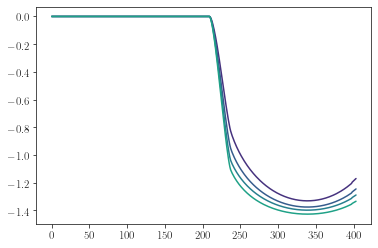

In [277]:
for n,gd in enumerate('griz'):
    plt.plot(lcs[gd])

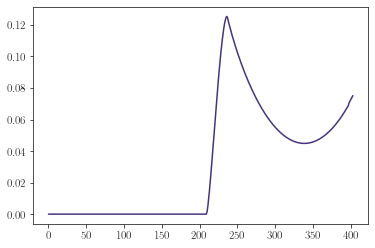

In [279]:
plt.plot(lcs['g']-lcs['r'])

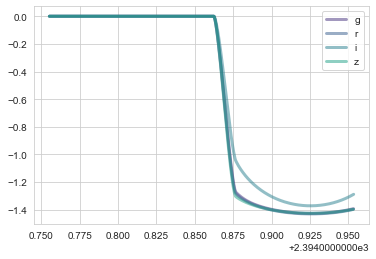

In [101]:
for n,gd in enumerate('griz'):
    plt.plot(alldata[gd+'_lco']['time'],
             np.nanmedian(np.nansum(trace["planets_x_"+gd+'_lco'],axis=2),axis=0),
                 '-',alpha=0.5,linewidth=3,label=gd)
plt.legend()

In [92]:
detrended.set_ylabel?

In [46]:
print([soln['dfdairmass_'+gd+'_lco'] for gd in 'griz'])

[array(-23.33145353), array(-15.65610511), array(-14.86542988), array(-8.25497978)]


In [8]:
plt.figure(figsize=(8,5))
plt.plot(alldata)

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

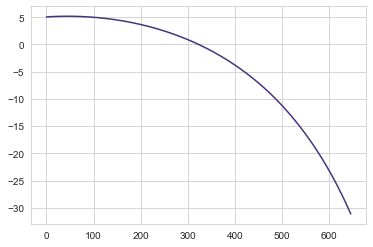

#### Figure - Cheops data:

#### Figure - Phase-folding

#### Table - All Model Variables

#### Table - Transit Times

#### Table - Planetary Properties

In [34]:
for var in combined_model.vars:
    if "TransformedDistribution" not in var and "__" not in var and "Deterministic" not in var:
        print(var)

TypeError: TensorType does not support iteration. Maybe you are using builtins.sum instead of theano.tensor.sum? (Maybe .max?)